In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('cleaned_df_for_BI.csv')

In [3]:
df.head()

,Stars,Ratings,Prices,Brands,Capacity,Energy_stars,config
0,4.2,4708,27490,SAMSUNG,236.0,3,Freezer-on-Top
1,4.2,4708,27490,SAMSUNG,236.0,3,Freezer-on-Top
2,4.3,6445,24990,SAMSUNG,236.0,3,Freezer-on-Top
3,4.1,4025,11990,WHIRLPOOL,184.0,2,Single Door
4,4.3,6445,24990,SAMSUNG,236.0,3,Freezer-on-Top


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Stars         321 non-null    float64
 1   Ratings       321 non-null    int64  
 2   Prices        321 non-null    int64  
 3   Brands        321 non-null    object 
 4   Capacity      321 non-null    float64
 5   Energy_stars  321 non-null    int64  
 6   config        321 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 17.7+ KB


## WE CAN OBSERVE THAT THERE IS NO NULL VALUES IN OUR DATA FRAME AND ITS WELL CLEANED

In [34]:
df.Brands.value_counts(normalize=True)

Brands
SAMSUNG        0.327103
GODREJ         0.186916
WHIRLPOOL      0.137072
HAIER          0.121495
LG             0.074766
PANASONIC      0.052960
IFB            0.024922
BOSCH          0.018692
VOLTAS BEKO    0.015576
WESTERN        0.012461
BPL            0.006231
LLOYD          0.006231
BLUE STAR      0.006231
TOSHIBA        0.006231
MIDEA          0.003115
Name: proportion, dtype: float64

In [35]:
df.Prices.groupby(df.Brands).mean()

Brands
BLUE STAR      25045.000000
BOSCH          39708.333333
BPL            16789.500000
GODREJ         22103.333333
HAIER          26849.230769
IFB            18965.000000
LG             31694.166667
LLOYD          24095.000000
MIDEA          19990.000000
PANASONIC      48395.882353
SAMSUNG        41853.371429
TOSHIBA        55490.000000
VOLTAS BEKO    24000.000000
WESTERN        34957.250000
WHIRLPOOL      21594.636364
Name: Prices, dtype: float64

# AVERAGE PRICE PER BRAND

In [39]:
df["stars_cat"]=pd.cut(df.Stars,bins=[1,2,4,5],labels=["poor","average","excellent"])

In [40]:
df.describe()

,Stars,Ratings,Prices,Capacity,Energy_stars
count,321.000000,321.000000,321.000000,321.000000,321.000000
mean,4.009346,1250.604361,31819.644860,283.283489,3.071651
std,0.494507,1708.104782,22494.324476,127.088911,1.047843
min,1.000000,1.000000,11580.000000,55.000000,1.000000
25%,3.900000,34.000000,16990.000000,190.000000,2.000000
50%,4.100000,370.000000,24990.000000,236.000000,3.000000
75%,4.200000,1721.000000,36590.000000,322.000000,4.000000
max,5.000000,6445.000000,181134.000000,688.000000,5.000000


### BY THE ABOVE NUMERIC STATISTICS WE CAN UNDER STAND THAT THERE MIGHT BE OUTLIERS IN THE RATINGS,PRICES,CAPACITY COLUMNS AS THERE LARGE DIFFERENCE BETWEEEN THE MEAN AND MEDIAN WE CAN OBSERVE THAT VISUALLY USING HISTOGRAM AND BOX PLOTS

<Axes: >

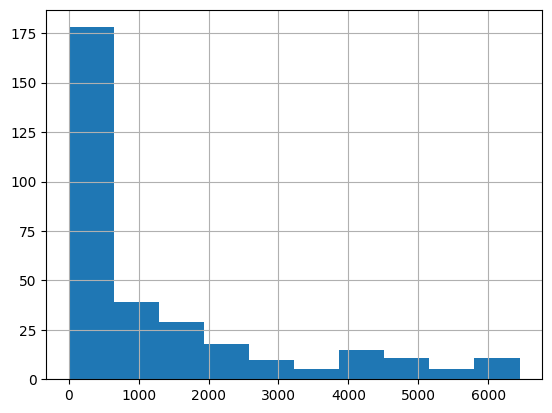

In [6]:
df.Ratings.hist()

<Axes: ylabel='Ratings'>

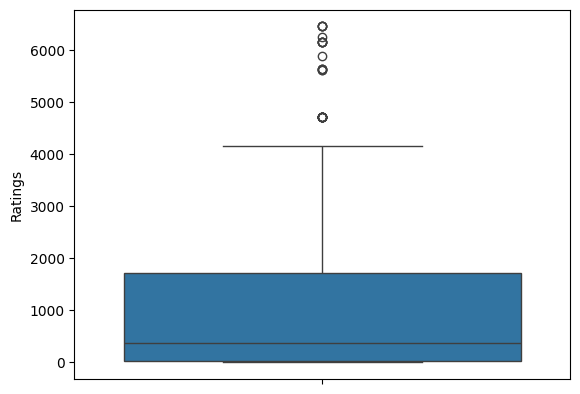

In [7]:
sns.boxplot(df.Ratings)

## AS WE CAN SEE THERE IS RIGHT SKEWNESS IN THE HISTOGRAM AND OUTLIER DATA POINTS IN BOX PLOT

In [8]:
from scipy.stats import skew

In [9]:
skew(df.Ratings)

np.float64(1.521585910835292)

<Axes: >

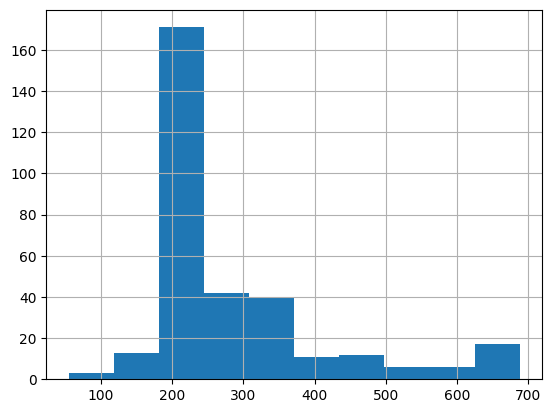

In [10]:
df.Capacity.hist()

## THE CAPACITY FEATURES HAVING SOME RIGHT SKEW BUT WE CAN SEE THAT ITS KINDA CLOSER TO NORMAL DISTRIBUTION 

<Axes: ylabel='Capacity'>

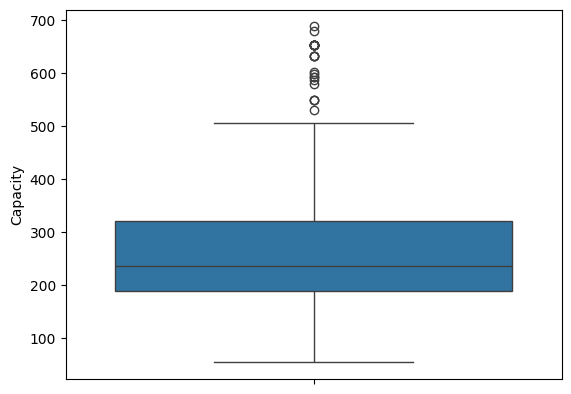

In [11]:
sns.boxplot(df.Capacity)

In [12]:
(df.Capacity>500).sum()

np.int64(29)

In [14]:
skew(df.Capacity)

np.float64(1.634867646786889)

<Axes: >

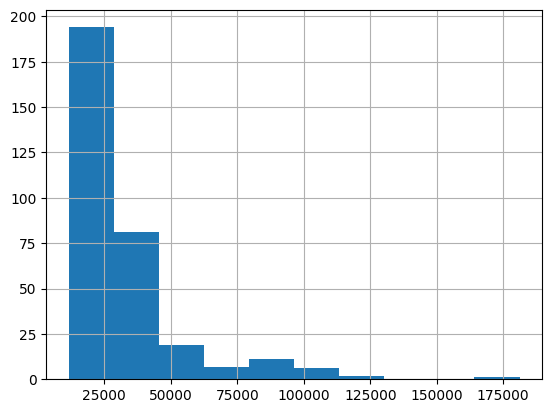

In [13]:
df.Prices.hist()

<Axes: ylabel='Prices'>

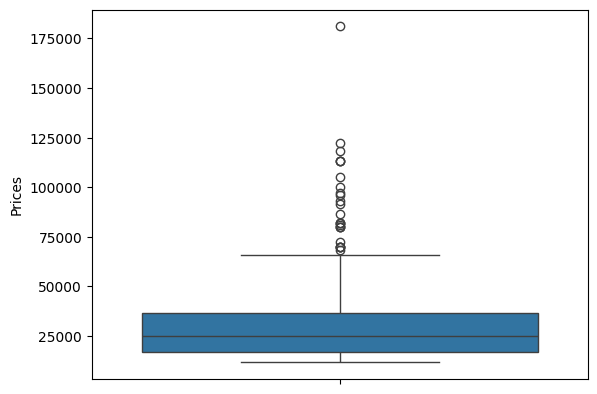

In [15]:
sns.boxplot(df.Prices)

## WE CAN CLEARLY SEE THAT THERE IS OUTLIERS IN THE PRICE FEATURE

In [16]:
skew(df.Prices)

np.float64(2.5050107499317673)

# ON POWER BI WE CAN WORK ON THIS DATA SET WITHOUT FURTHER CLEANING ITS OUTLIERS WE PERFORMED EDA JUST TO SEE HOW THE DATA IS SPREAD AROUND THE MEAN AND TO PRACTICE THE EDA LETS WORK ON BI ANALYSIS

In [41]:
df.head()

,Stars,Ratings,Prices,Brands,Capacity,Energy_stars,config,stars_cat
0,4.2,4708,27490,SAMSUNG,236.0,3,Freezer-on-Top,excellent
1,4.2,4708,27490,SAMSUNG,236.0,3,Freezer-on-Top,excellent
2,4.3,6445,24990,SAMSUNG,236.0,3,Freezer-on-Top,excellent
3,4.1,4025,11990,WHIRLPOOL,184.0,2,Single Door,excellent
4,4.3,6445,24990,SAMSUNG,236.0,3,Freezer-on-Top,excellent


In [56]:
pd.pivot_table(df,index="stars_cat",columns="Brands",observed=True,aggfunc="count",margins=True,sort=True)[:10]

Capacity                                                           \
Brands    BLUE STAR BOSCH  BPL GODREJ HAIER  IFB    LG LLOYD MIDEA PANASONIC   
stars_cat                                                                      
poor            NaN   NaN  NaN    NaN   NaN  NaN   NaN   NaN   NaN       NaN   
average         2.0   3.0  NaN   40.0  19.0  7.0   6.0   NaN   1.0       5.0   
excellent       NaN   2.0  1.0   20.0  19.0  1.0  18.0   1.0   NaN      12.0   
All             2.0   5.0  1.0   60.0  38.0  8.0  24.0   1.0   1.0      17.0   

           ... config                                                    \
Brands     ...     LG LLOYD MIDEA PANASONIC SAMSUNG TOSHIBA VOLTAS BEKO   
stars_cat  ...                                                            
poor       ...    NaN   NaN   NaN       NaN     NaN     NaN         NaN   
average    ...    6.0   NaN   1.0       5.0    15.0     1.0         4.0   
excellent  ...   18.0   1.0   NaN      12.0    90.0     1.0         1.0   
All        ...   24.0   1.0   1.0      17.0   105.0     2.0         5.0   

                                  
Brands    WESTERN WHIRLPOOL  All  
stars_cat                         
poor          NaN       1.0    1  
average       3.0      31.0  137  
excellent     1.0      12.0  179  
All           4.0      44.0  317  

[4 rows x 96 columns]

In [58]:
pd.crosstab(index=df.stars_cat,columns=df.Brands,margins=True)

Brands,BLUE STAR,BOSCH,BPL,GODREJ,HAIER,IFB,LG,LLOYD,MIDEA,PANASONIC,SAMSUNG,TOSHIBA,VOLTAS BEKO,WESTERN,WHIRLPOOL,All
stars_cat,,,,,,,,,,,,,,,,
poor,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
average,2,3,0,40,19,7,6,0,1,5,15,1,4,3,31,137
excellent,0,2,1,20,19,1,18,1,0,12,90,1,1,1,12,179
All,2,5,1,60,38,8,24,1,1,17,105,2,5,4,44,317


## BY THE ABOVE CROSS TABLE WE CAN CLEARLY UNDERSTAND THAT THE SAMSUNG,GODREJ,HAIER,LG AND WHIRLPOOL PRODUCTS HAS THE MOST EXCELLENT RATINGS THAT IS ABOVE 4.0 STARS

In [60]:
df.to_csv("featured_df_for_BI.csv",index=False)